# Implement Vanilla Gradient Descent on MSE loss




### PROLOGUE: 
Gradient Descent is where the magic happens and this optimization algorithm is used in  many ML/DL algorithms such as Linear Regression, Logistic Regression , SVM & Neural Networks.We seldom have to implement this algorithm oursleves because the libraries implement it under the hood.

Inspite of being a fundamental concept in ML , this has always been a daunting concept , especially for beginners. Theortically  it involves  Calculus and Vector Algebra but how does it all pan out in terms of code ? Implementing the  Gradient Descent algorithm helps one understand this algorithm at a granular level.



### PROJECT OBJECTIVE: 
To implement Gradient Decsent on MSE Loss function from a neural network perspective


### CODE/SOLUTION SUMMARY
We will be finding the best fit line on the given data set using Gradient Decsent i.e we will be implementing gradient decsent on the MSE loss function.Below is the step wise breakdown of the code
- We will begin by manually creating a 2D data set & visualize the data set
- Note here that at this point , we already know what the best fit line for this data looks like.
- We will then implement Gradient Descent & see whether we can arrive at this best fit line through the gradient Descent algorithm
- We start at random point and and iteratvely keep reducing the loss until we arrive at the best fit line
- Cross vaidate whether the "best fit" line we arrived at through gradient decsnt is indeed the best fit line.
- We will realize all the operations in matrix format because we are implemting this from a neural network perspective 

In [193]:
# Import  libraries

import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import sys
import numpy as np
import seaborn as sns
import statistics as stats
sns.set(color_codes=True)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
#Last import allows multiple outputs from one cell
import warnings
# Initialize the random number generator
import random
random.seed(101)

In [194]:
# Useful Configuration/Setting

# suppress display of warnings
warnings.filterwarnings('ignore')

# display all dataframe columns
pd.options.display.max_columns = None

# to set the limit to 3 decimals
pd.options.display.float_format = '{:.7f}'.format

# display all dataframe rows
pd.options.display.max_rows = None

#Setting to shows all entries in array displayed
np.set_printoptions(threshold=sys.maxsize)

In [195]:
# Lets create a  2 D data set manually

X=np.arange(2,20,2)
Y=2*X + 3

In [196]:
X

array([ 2,  4,  6,  8, 10, 12, 14, 16, 18])

In [197]:
Y

array([ 7, 11, 15, 19, 23, 27, 31, 35, 39])

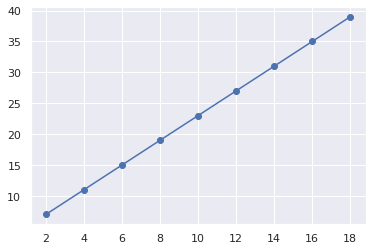

In [198]:
# Lets visualize the Actual Data Set

plt.scatter(x=X,y=Y)
plt.plot(X,Y,c='b')
plt.show()

In [199]:
# Cool , so we now know that the best fit line is y=2x+3 , because we created it 
# We could think of this as a toy data set because in reality we never data points that actually fall on one line .
# However , for the objective of this notebook , its convenient.
# We have plotted both the points and the line above 
# Lets see if gradient descent can arrive at the same line 

In [200]:
# Note :
# Variables naming convention
# We have used small letters for scalars and CAPS for Vectors

In [201]:
# Lets define our loss function 

def MSE(Y_True,Y_Pred):
  loss=np.sum(np.square(Y_True-Y_Pred))/Y_True.shape[0]
  return loss


In [202]:
# Lets define our linear function
def linearFunc(X,W):
  Y=W[0]*X +  W[1]
  return Y


In [203]:
# Start at a random weight
W=np.ones(shape=2)
W[0]=random.randint(5,10)
W[1]=random.randint(5,10)

In [204]:
print(W[0])
print(W[1])

9.0
6.0


In [205]:
# Now we have some random weights , lets visualize what the predicted line ...
# ... looks like with these weights agianst the actual line

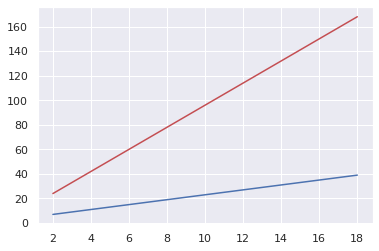

In [206]:
# Lets see what the line looks like at this point
plt.plot(X,linearFunc(X,W),c='r')# predicted line in red
plt.plot(X,Y,c='b')# actual line in blue

In [207]:
# We can see the predicted line and actual line in the above

##  Calculate Derivatives

- We would need to calculate the partial derviatives of 'm' and c(y=mx+c) which we will use later in our code
- The Derivates are calculated as below
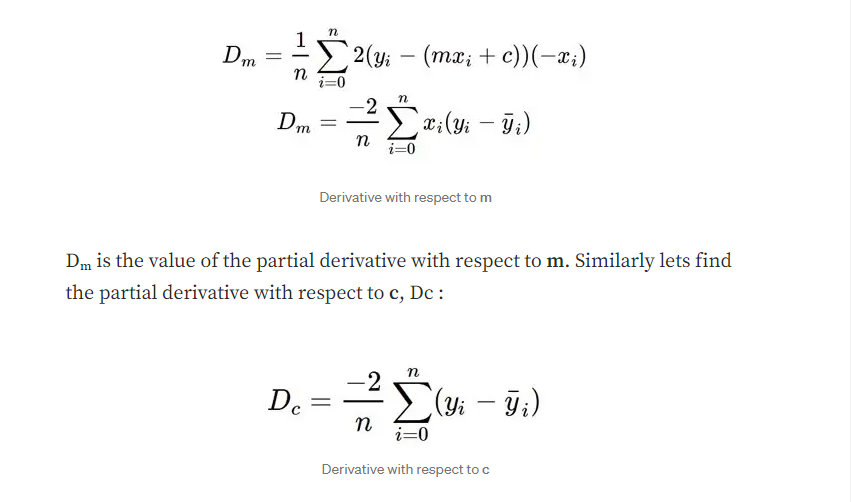

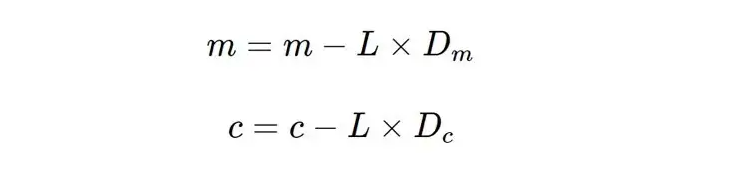

- Calculation of Derivatives above  referenced from https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931 

- In the above excerpt , we have seen how we calculate derivative  of each variable in the function seperately as these are partial derivatives
- Now , take note that, we can represent the above in the form of a vector, this is merely a representation which will allow us to make computations easier for Neural Networks.
- How is this applicable to Neuarl Networks ? Each node in a neural network is a linear function.
- Since this a muti dimensional function , the derivative of such functions can be represented as a vector(where partial derivative of each variable will be one element), this is usually represented as a column vector in theory.
- In our code , we will represent this as vector named grad which will basically comprise of 2 elements in this case
- So Dc and Dm calculated above will be each element of that vector

In [208]:
# Lets write a func to calculate these gradients
'''Make note that we will be calcuating gradient at different points on the loss function as we try to make ...
our way to the minima for every combination of weighst(m & c) that we are at.
Therefore the gradient function will take inputs as X(Input data points), Y(Actual Values), P(Predicted Values) and give us 
the corresponding gradients of 'm' and 'c' at that point '''

def grad(X,Y,P):
  '''Note here that we are going to realise this operation of calcuating gradient as one singly operation ...
  insetad of doing seperately for m anc c. The final gradient will be a vector where one element corresponds to m ...
  and one to c . So we will use the formula summation xi(y-yi) to calcuate both derivatives .Note only one of them had x into...
  so just to make up for that we will add a dummy layer of 1's in the x part of that deriative which does not have x multiplied ...
  with y-yi which for derivative of c because we canot do a multiplication op otherwise'''
  
  # add  a dummy layer of 1 's 
  X1=np.vstack((np.ones_like(X),X))

  #calculate term in derivative which we will need later
  E=(Y-P)

  #calculate number of samples 
  N=np.shape(X)[0]

  #Calculate gradient 
  G= - 1.0/N  *  X1.dot(E)

  return G

"Make note that we will be calcuating gradient at different points on the loss function as we try to make ...\nour way to the minima for every combination of weighst(m & c) that we are at.\nTherefore the gradient function will take inputs as X(Input data points), Y(Actual Values), P(Predicted Values) and give us \nthe corresponding gradients of 'm' and 'c' at that point "

##  Implement Gradient Descent for 1 iteration

In [209]:
# We have already assigned an arbitrary value for weights (aka m and c here)
print('W',W)

#Lets also re-print our X,Y
print('X',X) # input values
print('Y',Y) # Actual Output

#Alrighty, we are all set to proceed

W [9. 6.]
X [ 2  4  6  8 10 12 14 16 18]
Y [ 7 11 15 19 23 27 31 35 39]


In [210]:
# Lets use LR as 0.0001
lr=0.005

# Lets do one iteration and of GD and view results

P=linearFunc(X,W)     #Prediction with current weights
gradient=grad(X,Y,P)  #Calculate the gradient at this point

print("gradient",gradient)

#Lets update the weights 
W1= W - lr*gradient
# Why are we subtrating here ? Because we want to go in the opposite direction of the gradient

gradient [ 73.         916.66666667]


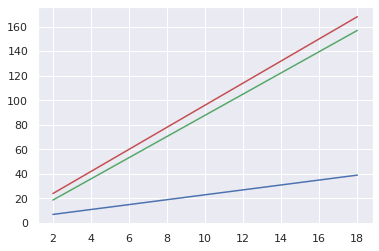

In [211]:
# Now lets plot orginal line , random line & line after first iteration in one graph

# Lets see what the line looks like at this point
plt.plot(X,linearFunc(X,W),c='r')# starting line in red
plt.plot(X,linearFunc(X,W1),c='g')#  line after one iteration in green
plt.plot(X,Y,c='b')# actual line in blue

# Neat , we can see it took a tiny step towards the best fit line , lets proceed

##  Implement Gradient Descent in its entirity

In [212]:
# We have already assigned an arbitrary value for weights (aka m and c here)
print('W',W)

#Lets also re-print our X,Y
print('X',X) # input values
print('Y',Y) # Actual Output

#Alrighty, we are all set to proceed

W [9. 6.]
X [ 2  4  6  8 10 12 14 16 18]
Y [ 7 11 15 19 23 27 31 35 39]


deltaWtThresh 0.1


currLoss 6635.666666666667
deltaWt [-0.073      -0.91666667]
abs 0.9896666666666674


currLoss 6370.853617777776
deltaWt [-0.07135333 -0.89825333]
abs 0.9696066666666656


currLoss 6117.213763943586
deltaWt [-0.06974155 -0.88023271]
abs 0.9499742577777774


currLoss 5874.277278474008
deltaWt [-0.0681639  -0.86259645]
abs 0.9307603532444442


currLoss 5641.594094639924
deltaWt [-0.06661966 -0.8453364 ]
abs 0.9119560594486527


currLoss 5418.733074619204
deltaWt [-0.06510813 -0.82844454]
abs 0.8935526718048615


currLoss 5205.281213394834
deltaWt [-0.0636286  -0.81191307]
abs 0.8755416707421988


currLoss 5000.842876135041
deltaWt [-0.06218041 -0.79573431]
abs 0.8579147177720379


currLoss 4805.039067647348
deltaWt [-0.06076287 -0.77990078]
abs 0.8406636516391669


currLoss 4617.5067325575465
deltaWt [-0.05937534 -0.76440515]
abs 0.8237804845547605


currLoss 4437.898084921392
deltaWt [-0.05801718 -0.74924022]
abs 0.8072573985094191


currLoss 4265.8799660311515
deltaWt [-0.05668777 -0.73439897]
abs 0.7910867416645724


currLoss 4101.133229231218
deltaWt [-0.05538649 -0.71987453]
abs 0.7752610248205825


currLoss 3943.3521506068337
deltaWt [-0.05411275 -0.70566017]
abs 0.759772917959916


currLoss 3792.2438644577614
deltaWt [-0.05286596 -0.69174928]
abs 0.7446152468637939


currLoss 3647.5278225145394
deltaWt [-0.05164555 -0.67813544]
abs 0.729780989800739


currLoss 3508.9352758987434
deltaWt [-0.05045096 -0.66481231]
abs 0.7152632742855278


currLoss 3376.2087788707086
deltaWt [-0.04928164 -0.65177373]
abs 0.7010553739070149


currLoss 3249.1017134483677
deltaWt [-0.04813705 -0.63901365]
abs 0.6871507052233872


currLoss 3127.377834019451
deltaWt [-0.04701667 -0.62652616]
abs 0.6735428247234037


currLoss 3010.8108311061496
deltaWt [-0.04591997 -0.61430545]
abs 0.6602254258522242


currLoss 2899.1839134767542
deltaWt [-0.04484647 -0.60234587]
abs 0.6471923361004617


currLoss 2792.289407832619
deltaWt [-0.04379566 -0.59064186]
abs 0.6344375141550911


currLoss 2689.928375331312
deltaWt [-0.04276706 -0.57918799]
abs 0.621955047110923


currLoss 2591.9102442378285
deltaWt [-0.0417602  -0.56797895]
abs 0.6097391477413492


currLoss 2498.0524580255865
deltaWt [-0.04077462 -0.55700953]
abs 0.5977841518270903


currLoss 2408.180138277405
deltaWt [-0.03980986 -0.54627465]
abs 0.5860845155417227


currLoss 2322.1257617640413
deltaWt [-0.03886549 -0.53576932]
abs 0.5746348128927776


currLoss 2239.7288511039774
deltaWt [-0.03794107 -0.52548867]
abs 0.5634297332172267


currLoss 2160.8356784333027
deltaWt [-0.03703617 -0.51542791]
abs 0.5524640787301962


currLoss 2085.2989815384917
deltaWt [-0.03615038 -0.50558238]
abs 0.5417327621257924


currLoss 2012.9776919279288
deltaWt [-0.03528329 -0.49594751]
abs 0.5312308042289109


currLoss 1943.7366743400698
deltaWt [-0.03443451 -0.48651882]
abs 0.5209533316969548


currLoss 1877.446477207236
deltaWt [-0.03360365 -0.47729193]
abs 0.5108955747704176


currLoss 1813.9830936142787
deltaWt [-0.03279032 -0.46826255]
abs 0.5010528650712578


currLoss 1753.2277323107317
deltaWt [-0.03199415 -0.45942648]
abs 0.4914206334480742


currLoss 1695.0665983536112
deltaWt [-0.03121479 -0.45077962]
abs 0.4819944078670906


currLoss 1639.3906829758405
deltaWt [-0.03045186 -0.44231795]
abs 0.47276981134795104


currLoss 1586.0955622922806
deltaWt [-0.02970502 -0.43403754]
abs 0.4637425599434035


currLoss 1535.0812044716865
deltaWt [-0.02897393 -0.42593453]
abs 0.45490846076191627


currLoss 1486.2517850185259
deltaWt [-0.02825826 -0.41800515]
abs 0.4462634100323237


currLoss 1439.5155098235857
deltaWt [-0.02755767 -0.41024572]
abs 0.4378033912096111


currLoss 1394.7844456566281
deltaWt [-0.02687185 -0.40265262]
abs 0.42952447312095376


currLoss 1351.9743577881093
deltaWt [-0.02620048 -0.39522233]
abs 0.4214228081511706


currLoss 1311.0045544401119
deltaWt [-0.02554325 -0.38795138]
abs 0.4134946304667304


currLoss 1271.7977377792947
deltaWt [-0.02489987 -0.38083639]
abs 0.405736254277528


currLoss 1234.279861176703
deltaWt [-0.02427003 -0.37387404]
abs 0.3981440721355902


currLoss 1198.3799924708755
deltaWt [-0.02365346 -0.3670611 ]
abs 0.3907145532699401


currLoss 1164.030182981765
deltaWt [-0.02304986 -0.36039438]
abs 0.3834442419568571


currLoss 1131.1653420336065
deltaWt [-0.02245897 -0.35387079]
abs 0.37632975592479134


currLoss 1099.7231167550462
deltaWt [-0.02188051 -0.34748728]
abs 0.3693677847931536


currLoss 1069.6437769345696
deltaWt [-0.02131422 -0.34124087]
abs 0.3625550885443056


currLoss 1040.870104718631
deltaWt [-0.02075983 -0.33512866]
abs 0.35588849602802863


currLoss 1013.3472889488008
deltaWt [-0.02021711 -0.3291478 ]
abs 0.3493649034977713


currLoss 987.022823942832
deltaWt [-0.01968579 -0.32329549]
abs 0.3429812731780135


currLoss 961.8464125327436
deltaWt [-0.01916563 -0.317569  ]
abs 0.3367346318620772


currLoss 937.769873180878
deltaWt [-0.01865641 -0.31196566]
abs 0.3306220695397455


currLoss 914.7470510024315
deltaWt [-0.01815788 -0.30648286]
abs 0.3246407380540415


currLoss 892.733732530151
deltaWt [-0.01766982 -0.30111803]
abs 0.31878784978657393


currLoss 871.6875640638201
deltaWt [-0.017192   -0.29586868]
abs 0.31306067637080304


currLoss 851.5679734537599
deltaWt [-0.01672421 -0.29073233]
abs 0.30745654743267714


currLoss 832.3360951739245
deltaWt [-0.01626624 -0.28570661]
abs 0.3019728493580143


currLoss 813.9546985462325
deltaWt [-0.01581787 -0.28078915]
abs 0.2966070240861107


currLoss 796.3881189836104
deltaWt [-0.0153789  -0.27597767]
abs 0.29135656792896203


currLoss 779.6021921247795
deltaWt [-0.01494913 -0.2712699 ]
abs 0.2862190304156007


currLoss 763.5641907391697
deltaWt [-0.01452837 -0.26666364]
abs 0.2811920131609815


currLoss 748.2427642854608
deltaWt [-0.01411643 -0.26215674]
abs 0.2762731687589346


currLoss 733.6078810121378
deltaWt [-0.01371311 -0.25774709]
abs 0.271460199698609


currLoss 719.6307724931553
deltaWt [-0.01331823 -0.25343263]
abs 0.26675085730399406


currLoss 706.2838804962947
deltaWt [-0.01293161 -0.24921133]
abs 0.26214294069592814


currLoss 693.5408060861082
deltaWt [-0.01255308 -0.24508121]
abs 0.25763429577622077


currLoss 681.3762608674632
deltaWt [-0.01218247 -0.24104034]
abs 0.2532228142333217


currLoss 669.7660202796707
deltaWt [-0.01181961 -0.23708683]
abs 0.24890643256917055


currLoss 658.6868788549361
deltaWt [-0.01146432 -0.23321881]
abs 0.24468313114668305


currLoss 648.116607358542
deltaWt [-0.01111646 -0.22943447]
abs 0.24055093325751287


currLoss 638.0339117315993
deltaWt [-0.01077586 -0.22573204]
abs 0.2365079042096232


currLoss 628.418393760571
deltaWt [-0.01044237 -0.22210978]
abs 0.23255215043424649


currLoss 619.2505134009359
deltaWt [-0.01011584 -0.21856598]
abs 0.22868181861181913


currLoss 610.5115526854295
deltaWt [-0.00979611 -0.21509898]
abs 0.2248950948165218


currLoss 602.1835811502116
deltaWt [-0.00948305 -0.21170715]
abs 0.22119020367895814


currLoss 594.2494227151283
deltaWt [-0.00917652 -0.20838889]
abs 0.2175654075666733


currLoss 586.6926239569077
deltaWt [-0.00887636 -0.20514264]
abs 0.21401900578207034


currLoss 579.497423716707
deltaWt [-0.00858246 -0.20196688]
abs 0.2105493337773563


currLoss 572.6487239858913
deltaWt [-0.00829467 -0.1988601 ]
abs 0.20715476238622976


currLoss 566.1320620162882
deltaWt [-0.00801286 -0.19582084]
abs 0.20383369707182286


currLoss 559.9335836034118
deltaWt [-0.00773691 -0.19284767]
abs 0.200584577190698


currLoss 554.0400174933361
deltaWt [-0.00746669 -0.18993918]
abs 0.19740587527245435


currLoss 548.4386508659474
deltaWt [-0.00720209 -0.18709401]
abs 0.19429609631463052


currLoss 543.1173058493131
deltaWt [-0.00694297 -0.18431081]
abs 0.19125377709264058


currLoss 538.0643170218005
deltaWt [-0.00668923 -0.18158825]
abs 0.1882774854843241


currLoss 533.2685098604011
deltaWt [-0.00644075 -0.17892507]
abs 0.18536581980889633


currLoss 528.7191800954648
deltaWt [-0.00619742 -0.17631999]
abs 0.18251740817992523


currLoss 524.4060739337275
deltaWt [-0.00595912 -0.17377178]
abs 0.17973090787206036


currLoss 520.3193691131063
deltaWt [-0.00572576 -0.17127924]
abs 0.17700500470124414


currLoss 516.4496567542875
deltaWt [-0.00549722 -0.16884119]
abs 0.17433841241804515


currLoss 512.7879239755925
deltaWt [-0.00527341 -0.16645646]
abs 0.17172987211397395


currLoss 509.3255372390192
deltaWt [-0.00505422 -0.16412393]
abs 0.1691781516403097


currLoss 506.05422639671065
deltaWt [-0.00483955 -0.16184249]
abs 0.1666820450393791


currLoss 502.9660694083915
deltaWt [-0.00462932 -0.15961106]
abs 0.16424037198784358


currLoss 500.05347770155043
deltaWt [-0.00442341 -0.15742857]
abs 0.16185197725187095


currLoss 497.30918214734044
deltaWt [-0.00422175 -0.15529398]
abs 0.15951573015387766


currLoss 494.7262196262994
deltaWt [-0.00402424 -0.15320629]
abs 0.1572305240505667


currLoss 492.29792015908345
deltaWt [-0.00383079 -0.15116449]
abs 0.15499527582212025


currLoss 490.01789457845126
deltaWt [-0.00364132 -0.14916761]
abs 0.15280892537222712


currLoss 487.8800227197383
deltaWt [-0.00345574 -0.1472147 ]
abs 0.1506704351386805


currLoss 485.87844210800813
deltaWt [-0.00327396 -0.14530483]
abs 0.1485787896144828


currLoss 484.0075371209989
deltaWt [-0.00309592 -0.14343708]
abs 0.14653299487903926


currLoss 482.26192860784874
deltaWt [-0.00292152 -0.14161056]
abs 0.14453207813936775


currLoss 480.6364639444354
deltaWt [-0.0027507  -0.13982439]
abs 0.14257508728101165


currLoss 479.12620750696374
deltaWt [-0.00258337 -0.13807773]
abs 0.14066109042857367


currLoss 477.7264315462128
deltaWt [-0.00241945 -0.13636972]
abs 0.13878917551551506


currLoss 476.4326074455902
deltaWt [-0.00225889 -0.13469956]
abs 0.13695844986312977


currLoss 475.240397346855
deltaWt [-0.0021016  -0.13306644]
abs 0.13516803976846603


currLoss 474.14564612804105
deltaWt [-0.00194752 -0.13146957]
abs 0.13341709010103564


currLoss 473.1443737187714
deltaWt [-0.00179657 -0.12990819]
abs 0.13170476390800356


currLoss 472.2327677387745
deltaWt [-0.0016487  -0.12838154]
abs 0.13003024202790936


currLoss 471.4071764460066
deltaWt [-0.00150383 -0.12688889]
abs 0.12839272271244795


currLoss 470.6641019813595
deltaWt [-0.0013619  -0.12542952]
abs 0.12679142125642517


currLoss 470.00019389748445
deltaWt [-0.00122286 -0.12400271]
abs 0.1252255696354565


currLoss 469.4122429597744
deltaWt [-0.00108662 -0.12260779]
abs 0.12369441615147547


currLoss 468.8971752080676
deltaWt [-0.00095315 -0.12124407]
abs 0.12219722508569131


currLoss 468.45204626810056
deltaWt [-0.00082237 -0.1199109 ]
abs 0.12073327635899389


currLoss 468.0740359022101
deltaWt [-0.00069424 -0.11860762]
abs 0.11930186519949615


currLoss 467.7604427892204
deltaWt [-0.00056869 -0.11733361]
abs 0.11790230181722627


currLoss 467.50867952387784
deltaWt [-0.00044567 -0.11608824]
abs 0.11653391108567668


currLoss 467.31626782659737
deltaWt [-0.00032512 -0.11487091]
abs 0.11519603223013508


currLoss 467.18083395467914
deltaWt [-0.000207   -0.11368102]
abs 0.11388801852266806


currLoss 467.1001043065177
deltaWt [-9.12516262e-05 -1.12517985e-01]
abs 0.1126092369835412


currLoss 467.07190121069056
deltaWt [ 2.21788754e-05 -1.11381247e-01]
abs 0.11140342583981333


currLoss 467.0941388921478
deltaWt [ 0.00013334 -0.11027024]
abs 0.11040358215259793


currLoss 467.1648196080566
deltaWt [ 0.00024228 -0.10918443]
abs 0.10942670609714966


currLoss 467.28202994616487
deltaWt [ 0.00034904 -0.10812327]
abs 0.1084723116583266


currLoss 467.44393727884665
deltaWt [ 0.00045367 -0.10708625]
abs 0.10753992315378547


currLoss 467.6487863662848
deltaWt [ 0.00055622 -0.10607286]
abs 0.10662907501430752


currLoss 467.89489610251724
deltaWt [ 0.00065673 -0.10508258]
abs 0.1057393115689047


currLoss 468.1806563983374
deltaWt [ 0.00075525 -0.10411494]
abs 0.10487018683441374


currLoss 468.5045251952954
deltaWt [ 0.00085181 -0.10316946]
abs 0.10402126430958081


currLoss 468.86502560528345
deltaWt [ 0.00094646 -0.10224566]
abs 0.10319211677356677


currLoss 469.2607431704265
deltaWt [ 0.00103924 -0.10134309]
abs 0.10238232608864717


currLoss 469.69032323821534
deltaWt [ 0.00113019 -0.10046129]
abs 0.1015914830072111


currLoss 470.1524684470391
deltaWt [ 0.00121935 -0.09959984]
abs 0.10081918698276571


currLoss 470.6459363174698
deltaWt [ 0.00130676 -0.09875829]
abs 0.10006504598502275


currLoss 471.1695369448554
deltaWt [ 0.00139245 -0.09793623]
abs 0.09932867631888698


breaking deltaWt [ 0.00139245 -0.09793623]


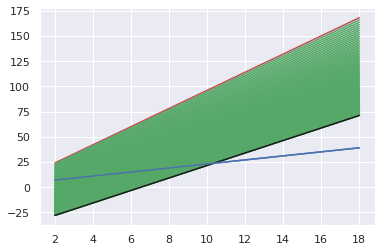

In [213]:
# Lets use LR as 0.001
lr=0.001
totalIterCount=300 # Total no of iterations allowed
itercount=0 #Current iteration number
deltaWtThresh=0.1 #0.006
print('deltaWtThresh',deltaWtThresh)
deltaWt=0 #Random initialization
#P=linearFunc(X,W)
#initLoss=MSE(Y,P) # This is loss with current weights

# Lets plot the actual line and initial line 
plt.plot(X,linearFunc(X,W),c='r')# starting line in red
plt.plot(X,Y,c='b')# actual line in blue


# We will now do multiple iterations
# Stopping condition ? Either max iterations are reached or change in wts is less than a certain th
#But why not monitor loss and just stop when loss starts increasing , because in this case it will work , this is a simple MSE loss func
# In actuality loss functions are more complex and we are trying to code with those in mind

while(True):
    P=linearFunc(X,W)     #Prediction with current weights
    gradient=grad(X,Y,P)  #Calculate the gradient at this point
    W_Updated=W - lr*gradient
    currLoss=MSE(Y,P)      
    print('currLoss',currLoss) #We are printing this just for info
    deltaWt=W_Updated - W
    print('deltaWt',deltaWt)
    print('abs',np.sum(abs(deltaWt)))

    W=W_Updated
    itercount=itercount+1
    plt.plot(X,linearFunc(X,W),c='g')#  line after one iteration in green

    if(itercount>=totalIterCount):
      print('breaking itercount',itercount)
      plt.plot(X,linearFunc(X,W),c='k')#  line after one iteration in green
      break
    if(np.sum(abs(deltaWt)) <= deltaWtThresh):
      print('breaking deltaWt',deltaWt)
      plt.plot(X,linearFunc(X,W),c='k')#
      break
  
# Lets plot the actual line and initial line once again
plt.plot(X,Y,c='b')# actual line in blue  


##  Result
- As can be seen in the graph above , the vanilla gradient descent algorithm made its way towards the best fit line through an iterative process, It was able to come close
- Red line indnicates where it started
- Each green line indicates one iteration
- Black line indicates final position of the GD line and the blue line indiactes the actual line
- Vanilla Gradient descent took 143 iterations to reach the best fit line i.e minima of the loss curve
- In future notebooks we can explore how adding momentum to gradient descent can help with faster convergence and better results

In [214]:
currLoss

471.1695369448554

In [215]:
itercount

143

In [216]:
W

array([  6.19616879, -40.43814695])

##  References
- The following references were used while creating this notebook:

- https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931 by Adarsh Menon

- Post Graduation AI/ML Study Material by GL/UAT
